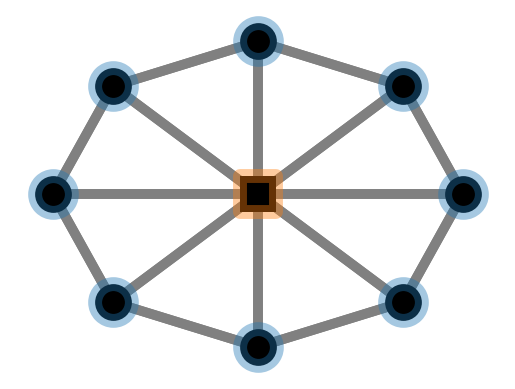

In [7]:
import copy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import seaborn as sns
from typing import Optional



def get_graph(N: int, name: str, l: Optional[int] = None, r: Optional[int] = None) -> nx.Graph:
  if name == 'star': return nx.star_graph(N-1)
  if name == 'path': return nx.path_graph(N)
  if name == 'wheel': return nx.wheel_graph(N)
  if name == 'book':
    assert N % 2 == 0
    G = nx.Graph()
    # Seam.
    G.add_edge(0, N-1)

    for x in range((N-2)//2):
      G.add_edge(0, 2*x+1)
      G.add_edge(2*x+1, 2*x+2)
      G.add_edge(2*x+2, N-1)
    return G
  if name == 'fan':
    assert N % 2 == 1
    G = nx.star_graph(N-1)
    for x in range(N//2):
      G.add_edge(2*x+1, 2*x+2)
    return G
  if name == 'biregular':
    assert l is not None
    assert r is not None
    assert N == 10

    L = list(range(0, 4))
    R = sorted(set(range(N))-set(L))

    assert 0 <= l <= len(R)
    assert 0 <= r <= len(L)

    while True:
      needs_redo = False
      G = nx.Graph()
      G.add_nodes_from(range(N))
      for x in L:
        R_copy = copy.copy(R)
        random.shuffle(R_copy)
        d = 0
        for y in R_copy:
          if d >= l: break
          if G.degree(y) < r:
            G.add_edge(x, y)
            d += 1
        if d != l:
          needs_redo = True
          break
      if all(G.degree(v) == r for v in R) and not needs_redo:
        return G


N = 9
name = 'wheel'
# G = get_graph(N, name, l=3, r=2)
G = get_graph(N, name)
assert len(G) == N
# nx.draw(G, pos=nx.layout.bipartite_layout(G, nodes=range(4)))
assert nx.is_connected(G)

D2 = {0}#, N-1} # set(range(0, 4))
D1 = set(range(N))-D2

OPAQUENESS = .4
palette = sns.color_palette('tab10', n_colors=2)
pos = nx.kamada_kawai_layout(G) #nx.layout.spring_layout(G)

# make regular (wheel of dharma)
if name == 'wheel':
  angles = np.linspace(0, 2*np.pi, N-1, endpoint=False) + np.pi/2
  pos = {0: (0., 0.)}
  for i, angle in enumerate(angles, start=1):
    x = np.cos(angle)
    y = np.sin(angle)
    pos[i] = (x, y)

fig, ax = plt.subplots()
nx.draw(
  G=G,
  pos=pos,
  nodelist=D1,
  node_color='black',
  edge_color='grey',
  edgecolors=(*palette[0], OPAQUENESS),
  node_shape='o',
  linewidths=10,
  width=7,
  node_size=700,
  ax=ax,
)
nx.draw(
  G=G,
  pos=pos,
  nodelist=D2,
  node_color='black',
  edge_color='grey',
  edgecolors=(*palette[1], OPAQUENESS),
  node_shape='s',
  linewidths=10,
  width=7,
  node_size=700,
  ax=ax,
)


In [8]:
fig.savefig(f'./pics/bidegreed-{name}.svg', transparent=True, bbox_inches='tight')

In [14]:
(*palette[0], 0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0)